### Bab III : Menggambarkan Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = [int(np.random.normal(40, 6)) for i in range(100)]

In [2]:
data = pd.DataFrame(data, columns=['Data'])
Data = data.Data

#### Mean, Median, Modus

In [3]:
#Mean, median, modus
miu = np.sum(data.Data) / len(data.Data)
median = np.median(data)
modus = data.Data.value_counts().iloc[0]
print(miu,'\n',median, '\n', modus)

38.81 
 39.0 
 10


#### Dispersi


In [4]:
#Jangkauan = Range, rentang nilai
jangkauan = np.max(Data) - np.min(Data)
print(jangkauan)

#Mean Deviation = Deviasi Rata-Rata
MD = abs(Data - Data.mean()).sum() / len(Data)
print(MD.round(2))

#variance:ragam data
varians_pop = ((Data - Data.mean()) ** 2).sum() / len(Data)
varian_sample = ((Data - Data.mean()) ** 2).sum() / len(Data)-1
print(varians_pop.round(2))
print(varian_sample.round(2))

#Standard Deviaton : akar dari variansi. 
std_pop = np.sqrt(varians_pop)
std_sample = np.sqrt(varian_sample)
print(std_pop.round(2))
print(std_sample.round(2))





27
5.39
43.47
42.47
6.59
6.52


#### Ukuran posisi

{'whiskers': [<matplotlib.lines.Line2D at 0x1830f023bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x1830f03d2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1830f023850>],
 'medians': [<matplotlib.lines.Line2D at 0x1830f03d970>],
 'fliers': [<matplotlib.lines.Line2D at 0x1830f03dcd0>],
 'means': []}

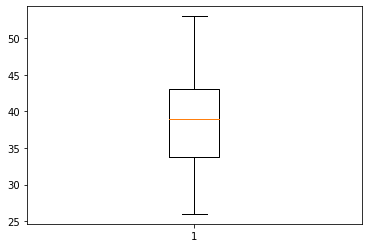

In [5]:
plt.boxplot(Data)

In [6]:
#Faktorial
class prob:
    
    def faktorialFor(n):
        hasil = 1
        for i in range(1, n + 1):
            hasil = hasil * i
        return hasil

    def faktorialRekursif(n):
        if n <= 1:
            return 1 
        else:
            hasil = n * prob.faktorialRekursif(n - 1)
        return hasil
    
    def permutasi(n, r):
        return prob.faktorialFor(n) / prob.faktorialFor(n - r)
    
    def kombinasi(n, r):
        return prob.faktorialRekursif(n) / (prob.faktorialRekursif(r) * prob.faktorialFor(n - r))
    

In [7]:

prob.permutasi(7, 3)

210.0

In [8]:
prob.kombinasi(7,3)

35.0

In [9]:
class Person:
  def __init__(mysillyobject, name, age):
    mysillyobject.name = name
    mysillyobject.age = age

  def myfunc(abc):
    print("Hello my name is " + abc.name)

p1 = Person("John", 36)
p1.myfunc()

Hello my name is John


### Probabilitas Distribusi Diskrit

Menghitung mean:

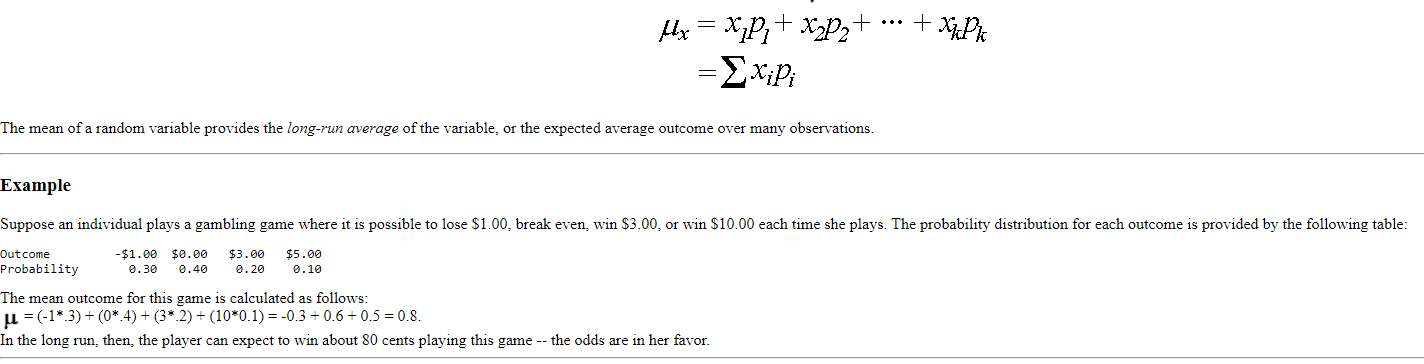

x = nilai yang muncul<br>px = probabilitas nilainya

Menghitung variansi dan standar deviasi Probabilitas Diskrit
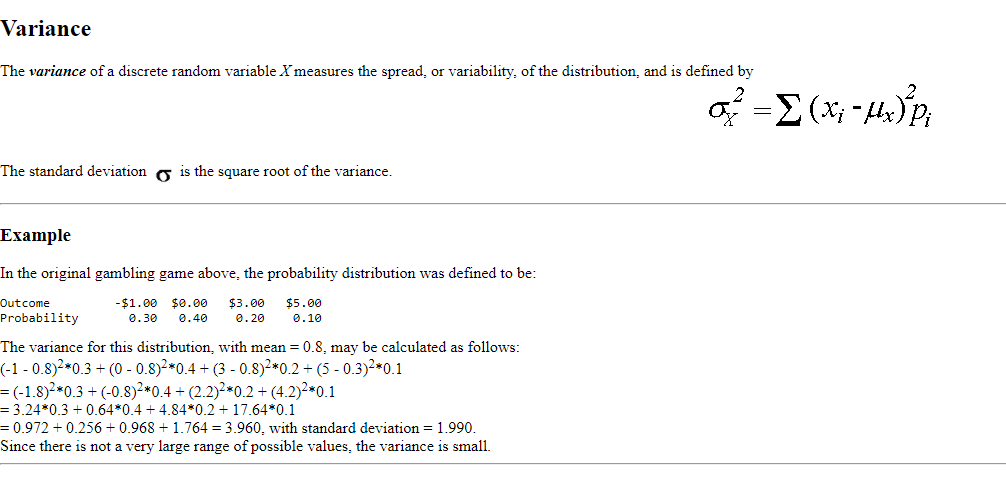

#### Probabilitas Binomial

Probabilitas binomial: hanya ada dua kemungkinan, seperti berhasil atau tidak, kepala atau ekor, ganteng atau tidak.
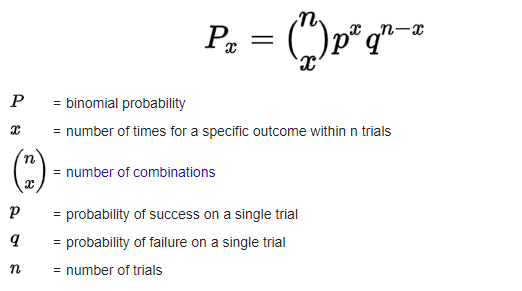

Itu kombinasi ya. Marikita bikin fungsi baru: binomHitung

In [49]:
#fungsi menghitung probabilitas binomial
def binomHitung(n, p):
    '''
    Menghitung nilai probabilitas binomial dari setiap nilai sukses yang keluar
    n = jumlah percobaan
    p = nilai probabilitas keberhasilan, harus antara 0 dan 1
    '''
    binom_dict = dict()
    binom_value = list()
    for i in range(n + 1):
        value = prob.kombinasi(n, i) * (p ** i) * ((1 - p) ** (n - i))
        value = np.round(value, 4)
        binom_value.append(value)
        binom_dict[i] = binom_value[i]
        
    return binom_dict

In [54]:
binom_test = binomHitung(5, 0.2)
print(binom_test)
print(np.cumsum(list(binom_test.values())))


{0: 0.3277, 1: 0.4096, 2: 0.2048, 3: 0.0512, 4: 0.0064, 5: 0.0003}
[0.3277 0.7373 0.9421 0.9933 0.9997 1.    ]


ModuleNotFoundError: No module named 'prob'